## Chargement du modele

In [1]:
from tkinter import *
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import numpy as np
from keras.models import load_model

Using TensorFlow backend.


In [2]:
class App:

    def __init__(self, master, size=280):
        self.size = size
        self.model = load_model('1472_CNN.h5')

        master.title("OCR application")
        master.resizable(False, False)
        
        # Create top canvas and image
        self.cv = Canvas(master, width=size, height=size, bg='white')
        self.cv.pack()

        # self.image1 = Image.new("RGB", (size, size), (255,255,255))
        self.image1 = Image.new("L", (self.size, self.size), 'black' )
        self.draw = ImageDraw.Draw(self.image1)

        self.cv.bind("<B1-Motion>", lambda e: self.paint(e.x,e.y))

        # Create bottom label and buttons
        frame = Frame(master)
        frame.pack(side=BOTTOM, fill=BOTH, expand=True)
        
        reslabel = Label(frame, text = "Dessine une lettre")
        reslabel.pack(side=LEFT, fill=Y, expand=True, pady=10)
        
        button = Button(frame, text="Evaluer", command=self.evaluate, width=6)
        button.pack(side=LEFT, fill=Y)

        button = Button(frame, text="Effacer", command=self.clear, width=6)
        button.pack(side=RIGHT, fill=Y)

    def evaluate(self):
        # img = self.image1.resize((28, 28)).convert('L') # image RGB
        img = self.image1.resize((28, 28))
        image_test = np.array(img)
        imshow(image_test, cmap='Greys')

        alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

        image_test = np.expand_dims(image_test, axis=(0,-1))
        prediction = np.argmax(self.model.predict(image_test) , axis=1)[0]
        lettre = alphabet[prediction]

        print(
            "C'est un ", lettre
        )

    def paint(self, x, y):
        t = 11

        x1, y1 = (x - t), (y - t)
        x2, y2 = (x + t), (y + t)
        self.cv.create_oval(x1, y1, x2, y2, fill='black', width=4)
        self.draw.ellipse([x1, y1, x2, y2], fill='white')

    def clear(self):
        self.image1 = Image.new("L", (self.size, self.size), 'black' )
        self.draw = ImageDraw.Draw(self.image1)

        # self.image1 = Image.new("L", (self.size, self.size))
        self.cv.delete("all")

C'est un  Q
C'est un  O
C'est un  O
C'est un  O
C'est un  Q
C'est un  B
C'est un  Q
C'est un  Q
C'est un  Q


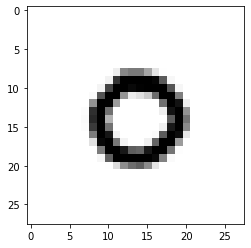

In [3]:
master = Tk()
app = App(master)
master.mainloop()